In [1]:
# from https://keras.io/examples/vision/mnist_convnet/

import numpy as np
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras import models
from matplotlib import pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

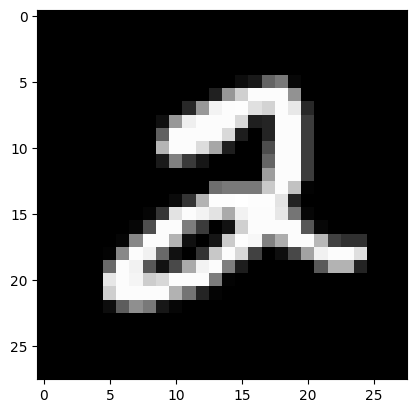

In [3]:
plt.imshow(x_train[5].astype(np.float32) / 255.0, cmap='gray')

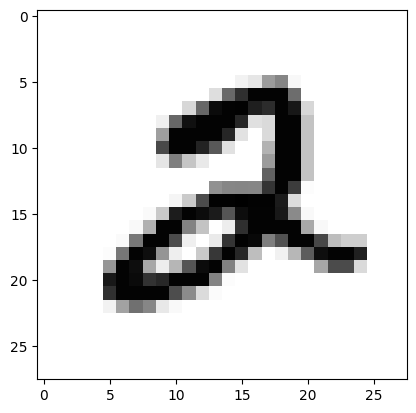

In [4]:
# zu 0-1 normalisieren
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# schwarz -> weiß machen und weiß-> schwarz machen damit es sich nicht von den selbst gemachten nummern unterscheidet
x_train = (-x_train) + 1
x_test = (-x_test) + 1
plt.imshow(x_train[5], cmap="gray")

In [5]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [6]:
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [8]:
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.7238 - loss: 0.9080 - val_accuracy: 0.9742 - val_loss: 0.0936
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9596 - loss: 0.1288 - val_accuracy: 0.9833 - val_loss: 0.0627
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9709 - loss: 0.0957 - val_accuracy: 0.9857 - val_loss: 0.0489
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9760 - loss: 0.0780 - val_accuracy: 0.9877 - val_loss: 0.0445
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9778 - loss: 0.0702 - val_accuracy: 0.9858 - val_loss: 0.0443
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9812 - loss: 0.0634 - val_accuracy: 0.9905 - val_loss: 0.0357
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9829 - loss: 0.0569 - val_accuracy: 0.9892 - val_loss: 0.0351
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9830 - loss: 0.0534 - val_accu

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.0260021910071373
Test accuracy: 0.9900000095367432


In [11]:
import os
from PIL import Image

In [12]:
path = os.getcwd()+"/customPNG"

In [13]:
os.listdir(path)

['1_img.png', '2_img.png', '4_img.png', '4_img1.png', '8_img.png', '9_img.png']

In [14]:
def loadCustomFiles(path):
    file_list = []
    labels = []
    for file in os.listdir(path):
        img = Image.open(os.path.join(path, file)).convert("L")
        img = img.resize((28, 28))
        img = np.array(img).astype('float32') / 255.0        
        file_list.append(img)
        label = int(file.split("_")[0])
        labels.append(label)
    
    custom_data = np.array(file_list)[..., np.newaxis]
    cat_labels = keras.utils.to_categorical(labels, 10)
    return custom_data, cat_labels

In [15]:
x_custom, y_custom = loadCustomFiles(path=path)

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


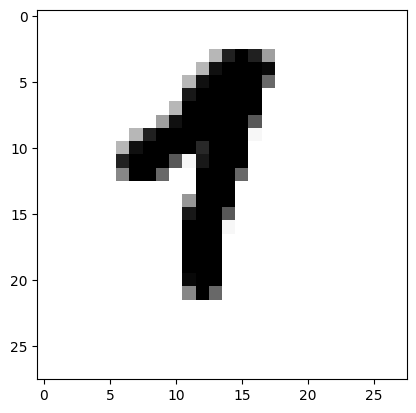

In [16]:
print(y_custom[0])
plt.imshow(x_custom[0], cmap="gray")

In [17]:
custom_score = model.evaluate(x_custom, y_custom, verbose=0)
print("Test loss:", custom_score[0])
print("Test accuracy:", custom_score[1])


Test loss: 0.1480989307165146
Test accuracy: 0.8333333134651184
